In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Atributos do Dataset

- **site_id** - ID code for the source hospital.
- **patient_id** - ID code for the patient.
- **image_id** - ID code for the image.
- **laterality** - Whether the image is of the left (L) or right (R) breast.
- **view** - The orientation of the image. The default for a screening exam is to capture two views per breast.
- **age** - The patient's age in years.
- **cancer** - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.
- **biopsy** - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.
- **invasive** - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.
- **BIRADS** - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.
- **implant** - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
- **density** - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.
- **machine_id** - An ID code for the imaging device.
- **difficult_negative_case** - True if the case was unusually difficult. Only provided for train.

## 2. Analise Exploratório Base de Treinamento

In [6]:
df_train = pd.read_csv("train.csv", sep=",")
df_train.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


### 2.1 Características gerais - Base de Treinamento

In [7]:
print("Número total de imagens: ", df_train["image_id"].count())

Número total de imagens:  43744


In [8]:
print("Número de pacientes distintos:" , df_train["patient_id"].nunique())

Número de pacientes distintos: 9530


In [9]:
def TabelaAtributo(dataset:pd.DataFrame, indice:str) -> pd.DataFrame:
    return pd.pivot_table(
        data=dataset
        , index=indice
        , values='image_id'
        , aggfunc=pd.Series.nunique
    ).reset_index()

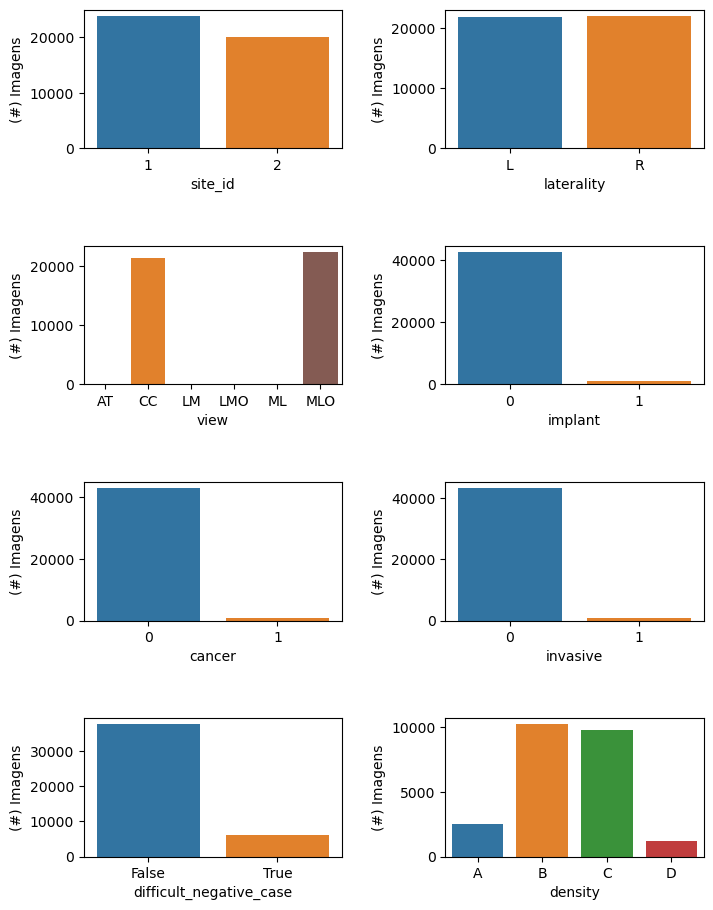

In [10]:
lista_atributos = [
    'site_id'  
    , 'laterality'  
    , 'view'   
    , 'implant'   
    , 'cancer'   
    , 'invasive'  
    , 'difficult_negative_case'   
    , 'density']
fig, ax = plt.subplots(4, 2, figsize=(8, 11))
for x in range(2):
    sns.barplot(
        data = TabelaAtributo(df_train, lista_atributos[x])
        , x = lista_atributos[x]
        , y = 'image_id'
        , ax = ax[0][x]
    )
    sns.barplot(
        data = TabelaAtributo(df_train, lista_atributos[x+2])
        , x = lista_atributos[x+2]
        , y = 'image_id'
        , ax = ax[1][x]
    )
    sns.barplot(
        data = TabelaAtributo(df_train, lista_atributos[x+4])
        , x = lista_atributos[x+4]
        , y = 'image_id'
        , ax = ax[2][x]
    )
    sns.barplot(
        data = TabelaAtributo(df_train, lista_atributos[x+6])
        , x = lista_atributos[x+6]
        , y = 'image_id'
        , ax = ax[3][x]
    )
    ax[0][x].set_ylabel("(#) Imagens")
    ax[1][x].set_ylabel("(#) Imagens")
    ax[2][x].set_ylabel("(#) Imagens")
    ax[3][x].set_ylabel("(#) Imagens")
    
plt.subplots_adjust(wspace=0.4, hspace=0.7) 

### 2.2 Caraceristicas Especificas - Variavel invasivo para cancer

In [11]:
df = pd.pivot_table(
data=df_train
, index=["cancer", "biopsy"]
, values='image_id'
, aggfunc=pd.Series.nunique).fillna(0).reset_index()

Text(0, 0.5, '(#) Imagens')

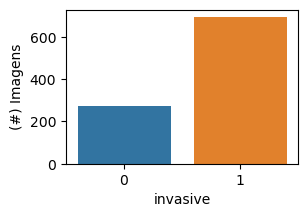

In [12]:
fig, ax = plt.subplots(1,1, figsize = (3,2))
sns.barplot(
    data=pd.pivot_table(
        data=df_train[df_train['cancer']==1]
        , index="invasive"
        , values='image_id'
        , aggfunc=pd.Series.nunique).fillna(0).reset_index()
    , x = 'invasive'
    , y = 'image_id'
    #, color = ['orange', 'red']
, ax = ax)
ax.set_ylabel("(#) Imagens")

### 2.3 Caraceristicas Especificas - Variavel Idade

Text(0, 0.5, '(#) Imagens')

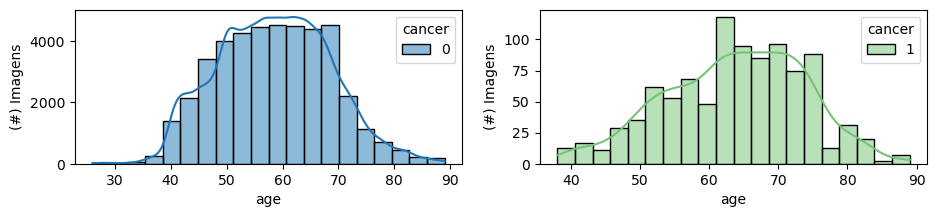

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(11, 2))
sns.histplot(
    data=df_train[df_train['cancer']==0]
    , x = 'age'
    , hue='cancer'
    , bins=20
    #, y = 'image_id'
    , kde=True
    , ax=ax[0]
)
sns.histplot(
    data=df_train[df_train['cancer']==1]
    , x = 'age'
    , bins=20
    , hue='cancer'
    #, y = 'image_id'
    , palette='Greens'
    , kde=True
    , ax=ax[1]
)
ax[0].set_ylabel("(#) Imagens")
ax[1].set_ylabel("(#) Imagens")